This notebook downloads a small piece of a text dataset to local cache (`/Users/USER/.cache/huggingface/datasets` on macbook). Then, you should manually install the files (which are dicts for activations and locations for each feature) from [https://huggingface.co/datasets/MrGonao/raw_features_gemma16/tree/main](https://huggingface.co/datasets/MrGonao/raw_features_gemma16/tree/main) to the features folder. After doing this, the code below will find you the activating documents for each feature. 

In [1]:
from graphs import load_tokens, load_activations
all_tokens, tokenizer = load_tokens("google/gemma-2-9B", "kh4dien/fineweb-100m-sample")
activations, locations = load_activations('features/11_0_3275.safetensors')

/Users/eriq/Desktop/syntax-sae/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
import graphs
import importlib
importlib.reload(graphs)
from graphs import visualize_feature, jsonify, \
    node_to_active_dicts, node_to_dict, merged_parse_trees, get_total_occurrences

In [18]:
all_graphs,c,a_d = visualize_feature(2502, activations, locations, all_tokens, tokenizer)

NameError: name 'activations' is not defined

In [19]:
import sqlite3
import json
def get_graph_from_db(n):
    conn = sqlite3.connect("feature_graphs.db")
    cursor = conn.cursor()
    cursor.execute("SELECT graphs, contexts, activation_dicts FROM features WHERE id = ?", (n,))
    result = cursor.fetchone()
    conn.close()

    if result:
        graphs = json.loads(result[0])
        contexts = json.loads(result[1])
        activation_dicts = json.loads(result[2])
        return graphs, contexts, activation_dicts
    else:
        return [], [], []

In [ ]:
import graphs
import importlib
importlib.reload(graphs)
from graphs import context_to_dict, merged_parse_trees, get_active_nodes


all_graphs, contexts, activation_dicts = get_graph_from_db(2502)
all_graphs = [json.loads(graph) for graph in all_graphs]
graphs = [context_to_dict(context, activation_dict) for context, activation_dict in zip(contexts, activation_dicts)]
merged_parse_trees(graphs)

  

 Recall  Recall
  

 Safety  Safety
 recall  recall
 a  a
 recall  recall
  

 of  of
  

The The
<bos> <bos>
 Rec  Rec
alls alls
 a A
 the  The
Product  product
 at  At
<bos> <bos>
  

 recalls  recalls
 recall  recall
 recalled  recalled
 recalling  recalling
 Rec  Rec
alls alls
<bos> <bos>
5 5
 recalls  recalls
 the  the
 the The
  

 affected Affected
 recalled  recalled
  

 Toyota Toyota
<bos> <bos>


[{'id': 20,
  'text': ' Seb',
  'lemma': ' Seb',
  'pos': 'NA',
  'dep': 'NA',
  'tag': 5.91796875,
  'children': [{'id': 21,
    'text': 'ring',
    'lemma': 'ring',
    'pos': 'NA',
    'dep': 'NA',
    'tag': 5.3984375,
    'children': [{'id': 22,
      'text': ' and',
      'lemma': ' and',
      'pos': 'NA',
      'dep': 'NA',
      'tag': 7.2890625,
      'children': [],
      'occurrences': 1}],
    'occurrences': 1}],
  'occurrences': 1},
 {'id': 33,
  'text': ' voluntarily',
  'lemma': ' voluntarily',
  'pos': 'NA',
  'dep': 'NA',
  'tag': 17.46875,
  'children': [{'id': 34,
    'text': ' recalling',
    'lemma': ' recalling',
    'pos': 'NA',
    'dep': 'NA',
    'tag': 86.0,
    'children': [{'id': 35,
      'text': ' about',
      'lemma': ' about',
      'pos': 'NA',
      'dep': 'NA',
      'tag': 58.3125,
      'children': [{'id': 36,
        'text': ' ',
        'lemma': ' ',
        'pos': 'NA',
        'dep': 'NA',
        'tag': 5.83203125,
        'children': [{'id'

In [38]:
graphs[0]

{'id': 1,
 'text': '\n',
 'lemma': '\n',
 'pos': 'NA',
 'dep': 'NA',
 'tag': 0,
 'children': [{'id': 2,
   'text': 'See',
   'lemma': 'See',
   'pos': 'NA',
   'dep': 'NA',
   'tag': 0,
   'children': [{'id': 3,
     'text': ' main',
     'lemma': ' main',
     'pos': 'NA',
     'dep': 'NA',
     'tag': 0,
     'children': [{'id': 4,
       'text': ' index',
       'lemma': ' index',
       'pos': 'NA',
       'dep': 'NA',
       'tag': 0,
       'children': [{'id': 5,
         'text': ' page',
         'lemma': ' page',
         'pos': 'NA',
         'dep': 'NA',
         'tag': 0,
         'children': [{'id': 6,
           'text': ' via',
           'lemma': ' via',
           'pos': 'NA',
           'dep': 'NA',
           'tag': 0,
           'children': [{'id': 7,
             'text': ' link',
             'lemma': ' link',
             'pos': 'NA',
             'dep': 'NA',
             'tag': 0,
             'children': [{'id': 8,
               'text': ' at',
               'le

In [37]:
print(get_active_nodes(graphs[0]))

[]


In [ ]:
context = contexts[0]
next(iter(context))

'\n'

In [127]:
def soft_match(str1, str2):
    # return str1 == str2
    str1 = str1.lower().strip()
    str1 = str2.lower().strip()
    return str1 in str2 or str2 in str1

soft_match("recalls", "Recalls")

False

In [99]:
merged = merged_parse_trees(graphs)
print(merged)
depths = [get_total_occurrences(tree) for tree in merged]
merged = sorted(zip(merged, depths), key=lambda x:x[1], reverse=True)
for tree in merged[0:5]:
    print(tree[1])

[{'text': 'Chrysler', 'lemma': 'Chrysler', 'pos': 'PROPN', 'dep': 'compound', 'tag': 25.453125, 'children': [], 'occurrences': 2}, {'text': '700', 'lemma': '700', 'pos': 'NUM', 'dep': 'nummod', 'tag': 22.53125, 'children': [{'text': 'Nearly', 'lemma': 'nearly', 'pos': 'ADV', 'dep': 'advmod', 'tag': 20.328125, 'children': [], 'occurrences': 1}], 'occurrences': 1}, {'text': 'Shifters', 'lemma': 'Shifters', 'pos': 'PROPN', 'dep': 'nsubj', 'tag': 26.296875, 'children': [{'text': 'Gear', 'lemma': 'Gear', 'pos': 'PROPN', 'dep': 'compound', 'tag': 11.328125, 'children': [{'text': 'Chrysler', 'lemma': 'Chrysler', 'pos': 'PROPN', 'dep': 'compound', 'tag': 25.453125, 'children': [], 'occurrences': 1}, {'text': 'Electronic', 'lemma': 'Electronic', 'pos': 'PROPN', 'dep': 'compound', 'tag': 21.1875, 'children': [], 'occurrences': 1}], 'occurrences': 1}], 'occurrences': 1}, {'text': 'Shifter', 'lemma': 'Shifter', 'pos': 'PROPN', 'dep': 'compound', 'tag': 33.09375, 'children': [{'text': 'Gear', 'lemm

In [16]:
merged[1]

{'text': 'in',
 'lemma': 'in',
 'pos': 'ADP',
 'dep': 'prep',
 'tag': 33.28125,
 'children': [{'text': 'Colorado',
   'lemma': 'Colorado',
   'pos': 'PROPN',
   'dep': 'pobj',
   'tag': 29.84375,
   'children': [{'text': 'southwestern',
     'lemma': 'southwestern',
     'pos': 'ADJ',
     'dep': 'amod',
     'tag': 13.8046875,
     'children': [],
     'occurrences': 1}],
   'occurrences': 1},
  {'text': 'forest',
   'lemma': 'forest',
   'pos': 'NOUN',
   'dep': 'pobj',
   'tag': 19.25,
   'children': [{'text': 'the',
     'lemma': 'the',
     'pos': 'DET',
     'dep': 'det',
     'tag': 46.0625,
     'children': [],
     'occurrences': 1}],
   'occurrences': 1},
  {'text': 'California',
   'lemma': 'California',
   'pos': 'PROPN',
   'dep': 'pobj',
   'tag': 51.125,
   'children': [],
   'occurrences': 1}],
 'occurrences': 5}

In [43]:
!pip install plotly
import plotly.graph_objects as go

def flatten_tree(tree, parent=""):
    """
    Flattens the tree structure into a list of paths and values for visualization.
    
    Args:
        tree (dict): The root node of the tree.
        parent (str): The parent path (used for hierarchical representation).
    
    Returns:
        list: A list of paths in the tree.
        list: A list of corresponding 'occurrences' for each path.
    """
    paths = []
    values = []

    # Construct the current node's path
    current_path = f"{parent}/{tree['text']}" if parent else tree['text']

    # Add the current node's data
    paths.append(current_path)
    values.append(tree['occurrences'])

    # Recurse for each child
    for child in tree.get('children', []):
        child_paths, child_values = flatten_tree(child, current_path)
        paths.extend(child_paths)
        values.extend(child_values)

    return paths, values

def visualize_tree(tree):
    """
    Visualizes a single merged tree using Plotly's sunburst chart.
    
    Args:
        tree (dict): The root node of the tree.
    """
    # Flatten the tree into paths and values
    paths, values = flatten_tree(tree)

    # Split paths into labels and parents for Plotly
    labels = [path.split('/')[-1] for path in paths]
    parents = ["/".join(path.split('/')[:-1]) for path in paths]
    parents = [parent if parent else "" for parent in parents]  # Root has no parent

    # Create the Plotly sunburst chart
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        branchvalues="total",
        hovertemplate="<b>%{label}</b><br>Occurrences: %{value}<extra></extra>"
    ))

    # Customize layout
    fig.update_layout(
        margin=dict(t=0, l=0, r=0, b=0),
        title="Merged Tree Visualization"
    )

    # Show the plot
    fig.show()

visualize_tree(merged[0])


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [22]:
!pip install --upgrade nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.20.0-py3-none-any.whl (23 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [14]:
conn.close()

processed feature 0
processed feature 50
processed feature 100
processed feature 150
processed feature 200
processed feature 250
Error processing feature 255: 'NoneType' object has no attribute '_'
Error processing feature 277: max() iterable argument is empty
processed feature 300
Error processing feature 322: max() iterable argument is empty
processed feature 350
processed feature 400
Error processing feature 405: max() iterable argument is empty
Error processing feature 425: max() iterable argument is empty
Error processing feature 433: max() iterable argument is empty
processed feature 450
processed feature 500
processed feature 550
Error processing feature 585: max() iterable argument is empty
processed feature 600
Error processing feature 636: max() iterable argument is empty
Error processing feature 641: 'NoneType' object has no attribute '_'
processed feature 650
Error processing feature 658: max() iterable argument is empty
processed feature 700
Error processing feature 711: '

In [2]:
import sqlite3
import json
import graphs
# Replace 'desired_index' with the index of the feature you want to retrieve
desired_index = 2700
conn = sqlite3.connect("feature_graphs.db")

cursor = conn.cursor()

# Query for the specific feature
cursor.execute("SELECT graphs, contexts, activation_dicts FROM features WHERE id = ?", (desired_index,))
result = cursor.fetchone()

print(result)
# Convert JSON strings back to their original formats
if result:
    graphs = json.loads(result[0])
    contexts = json.loads(result[1])
    activation_dicts = json.loads(result[2])
    print("Graphs:", graphs)
    print("Contexts:", contexts)
    print("Activation Dicts:", activation_dicts)
# Close the connection
conn.close()

/Users/eriq/Desktop/syntax-sae/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


('["{\\n    \\"text\\": \\"|Show\\",\\n    \\"lemma\\": \\"|show\\",\\n    \\"pos\\": \\"VERB\\",\\n    \\"dep\\": \\"ROOT\\",\\n    \\"tag\\": 11.0,\\n    \\"children\\": [\\n        {\\n            \\"text\\": \\"<\\",\\n            \\"lemma\\": \\"<\\",\\n            \\"pos\\": \\"X\\",\\n            \\"dep\\": \\"dep\\",\\n            \\"tag\\": 0.0,\\n            \\"children\\": [\\n                {\\n                    \\"text\\": \\"bos\\",\\n                    \\"lemma\\": \\"bos\\",\\n                    \\"pos\\": \\"PROPN\\",\\n                    \\"dep\\": \\"pobj\\",\\n                    \\"tag\\": 0.0,\\n                    \\"children\\": []\\n                },\\n                {\\n                    \\"text\\": \\">\\",\\n                    \\"lemma\\": \\">\\",\\n                    \\"pos\\": \\"X\\",\\n                    \\"dep\\": \\"punct\\",\\n                    \\"tag\\": 0.0,\\n                    \\"children\\": []\\n                },\\n            

In [5]:
conn = sqlite3.connect("feature_graphs.db")
cursor = conn.cursor()
cursor.execute("SELECT graphs, contexts, activation_dicts FROM features WHERE id = ?", (200,))
result = cursor.fetchone()

print(result)
# Convert JSON strings back to their original formats
if result:
    graphs = json.loads(result[0])
    contexts = json.loads(result[1])
    activation_dicts = json.loads(result[2])
    graphs[0]

('["{\\n    \\"text\\": \\"was\\",\\n    \\"lemma\\": \\"be\\",\\n    \\"pos\\": \\"AUX\\",\\n    \\"dep\\": \\"ROOT\\",\\n    \\"tag\\": 0.0,\\n    \\"children\\": [\\n        {\\n            \\"text\\": \\"problem\\",\\n            \\"lemma\\": \\"problem\\",\\n            \\"pos\\": \\"NOUN\\",\\n            \\"dep\\": \\"nsubj\\",\\n            \\"tag\\": 0.0,\\n            \\"children\\": [\\n                {\\n                    \\"text\\": \\"The\\",\\n                    \\"lemma\\": \\"the\\",\\n                    \\"pos\\": \\"DET\\",\\n                    \\"dep\\": \\"det\\",\\n                    \\"tag\\": 0.0,\\n                    \\"children\\": []\\n                },\\n                {\\n                    \\"text\\": \\"severity\\",\\n                    \\"lemma\\": \\"severity\\",\\n                    \\"pos\\": \\"NOUN\\",\\n                    \\"dep\\": \\"compound\\",\\n                    \\"tag\\": 0.0,\\n                    \\"children\\": [\\n       

In [26]:
def joint_parse_tree(parse_trees):
    combined_children = []
    for tree in parse_trees:
        print(tree)
        combined_children.extend(tree['children'])  # Add all children of the root

    # Now, create a new root node with combined text and children
    combined_root_node = {
        "text": "ROOT",
        "lemma": "be",  # You can adjust this as needed
        "pos": "AUX",  # Adjust POS as needed
        "dep": "ROOT",  # The combined node will still be the ROOT
        "tag": 0.0,  # Adjust the tag if necessary
        "children": combined_children  # Append all the children
    }
    return combined_root_node

conn = sqlite3.connect("feature_graphs.db")
cursor = conn.cursor()
cursor.execute("SELECT graphs, contexts, activation_dicts FROM features WHERE id = ?", (200,))
result = cursor.fetchone()

graphs = json.loads(result[0])
contexts = json.loads(result[1])
activation_dicts = json.loads(result[2])
graphs = [json.loads(graph) for graph in graphs]
print("from outside")

joint_parse_tree(graphs)

from outside
{'text': 'was', 'lemma': 'be', 'pos': 'AUX', 'dep': 'ROOT', 'tag': 0.0, 'children': [{'text': 'problem', 'lemma': 'problem', 'pos': 'NOUN', 'dep': 'nsubj', 'tag': 0.0, 'children': [{'text': 'The', 'lemma': 'the', 'pos': 'DET', 'dep': 'det', 'tag': 0.0, 'children': []}, {'text': 'severity', 'lemma': 'severity', 'pos': 'NOUN', 'dep': 'compound', 'tag': 0.0, 'children': [{'text': 'highest', 'lemma': 'high', 'pos': 'ADJ', 'dep': 'amod', 'tag': 0.0, 'children': []}, {'text': '-', 'lemma': '-', 'pos': 'PUNCT', 'dep': 'punct', 'tag': 0.0, 'children': []}]}, {'text': 'uncovered', 'lemma': 'uncover', 'pos': 'VERB', 'dep': 'relcl', 'tag': 0.0, 'children': [{'text': 'that', 'lemma': 'that', 'pos': 'PRON', 'dep': 'dobj', 'tag': 0.0, 'children': []}, {'text': 'Yibelo', 'lemma': 'Yibelo', 'pos': 'PROPN', 'dep': 'nsubj', 'tag': 0.0, 'children': []}]}]}, {'text': 'misconfiguration', 'lemma': 'misconfiguration', 'pos': 'NOUN', 'dep': 'attr', 'tag': 0.0, 'children': [{'text': 'a', 'lemma': 

{'text': 'ROOT',
 'lemma': 'be',
 'pos': 'AUX',
 'dep': 'ROOT',
 'tag': 0.0,
 'children': [{'text': 'problem',
   'lemma': 'problem',
   'pos': 'NOUN',
   'dep': 'nsubj',
   'tag': 0.0,
   'children': [{'text': 'The',
     'lemma': 'the',
     'pos': 'DET',
     'dep': 'det',
     'tag': 0.0,
     'children': []},
    {'text': 'severity',
     'lemma': 'severity',
     'pos': 'NOUN',
     'dep': 'compound',
     'tag': 0.0,
     'children': [{'text': 'highest',
       'lemma': 'high',
       'pos': 'ADJ',
       'dep': 'amod',
       'tag': 0.0,
       'children': []},
      {'text': '-',
       'lemma': '-',
       'pos': 'PUNCT',
       'dep': 'punct',
       'tag': 0.0,
       'children': []}]},
    {'text': 'uncovered',
     'lemma': 'uncover',
     'pos': 'VERB',
     'dep': 'relcl',
     'tag': 0.0,
     'children': [{'text': 'that',
       'lemma': 'that',
       'pos': 'PRON',
       'dep': 'dobj',
       'tag': 0.0,
       'children': []},
      {'text': 'Yibelo',
       'lemm

In [4]:
tokenizer

GemmaTokenizerFast(name_or_path='google/gemma-2-9B', vocab_size=256000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<bos>', 'eos_token': '<eos>', 'unk_token': '<unk>', 'pad_token': '<eos>', 'additional_special_tokens': ['<start_of_turn>', '<end_of_turn>']}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<eos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<bos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=False),
	5: AddedToken("<2mass>", rstrip=False, lstrip=False, single_wo

In [2]:
import spacy
spacy.symbols.IDS

{'': 0,
 'IS_ALPHA': 1,
 'IS_ASCII': 2,
 'IS_DIGIT': 3,
 'IS_LOWER': 4,
 'IS_PUNCT': 5,
 'IS_SPACE': 6,
 'IS_TITLE': 7,
 'IS_UPPER': 8,
 'LIKE_URL': 9,
 'LIKE_NUM': 10,
 'LIKE_EMAIL': 11,
 'IS_STOP': 12,
 'IS_OOV_DEPRECATED': 13,
 'IS_BRACKET': 14,
 'IS_QUOTE': 15,
 'IS_LEFT_PUNCT': 16,
 'IS_RIGHT_PUNCT': 17,
 'IS_CURRENCY': 18,
 'FLAG19': 19,
 'FLAG20': 20,
 'FLAG21': 21,
 'FLAG22': 22,
 'FLAG23': 23,
 'FLAG24': 24,
 'FLAG25': 25,
 'FLAG26': 26,
 'FLAG27': 27,
 'FLAG28': 28,
 'FLAG29': 29,
 'FLAG30': 30,
 'FLAG31': 31,
 'FLAG32': 32,
 'FLAG33': 33,
 'FLAG34': 34,
 'FLAG35': 35,
 'FLAG36': 36,
 'FLAG37': 37,
 'FLAG38': 38,
 'FLAG39': 39,
 'FLAG40': 40,
 'FLAG41': 41,
 'FLAG42': 42,
 'FLAG43': 43,
 'FLAG44': 44,
 'FLAG45': 45,
 'FLAG46': 46,
 'FLAG47': 47,
 'FLAG48': 48,
 'FLAG49': 49,
 'FLAG50': 50,
 'FLAG51': 51,
 'FLAG52': 52,
 'FLAG53': 53,
 'FLAG54': 54,
 'FLAG55': 55,
 'FLAG56': 56,
 'FLAG57': 57,
 'FLAG58': 58,
 'FLAG59': 59,
 'FLAG60': 60,
 'FLAG61': 61,
 'FLAG62': 62,
 'FLAG63'

In [4]:
k = { 'ADJ': 84,
 'ADP': 85,
 'ADV': 86,
 'AUX': 87,
 'CONJ': 88,
 'CCONJ': 89,
 'DET': 90,
 'INTJ': 91,
 'NOUN': 92,
 'NUM': 93,
 'PART': 94,
 'PRON': 95,
 'PROPN': 96,
 'PUNCT': 97,
 'SCONJ': 98,
 'SYM': 99,
 'VERB': 100,
 'X': 101}

k = dict((v,k) for k,v in k.items())
k

{84: 'ADJ',
 85: 'ADP',
 86: 'ADV',
 87: 'AUX',
 88: 'CONJ',
 89: 'CCONJ',
 90: 'DET',
 91: 'INTJ',
 92: 'NOUN',
 93: 'NUM',
 94: 'PART',
 95: 'PRON',
 96: 'PROPN',
 97: 'PUNCT',
 98: 'SCONJ',
 99: 'SYM',
 100: 'VERB',
 101: 'X'}

In [5]:
### Get Contexts and View Batch
import torch
#get context
def get_context(batch: list[str], pos: int, n=5) -> str:
    context = ''.join([s for s in batch[pos-n:pos+n] if s != '\n'])
    return context

def view_batch(n: int, tokenizer) -> list[str]:
    if n >= len(all_tokens):
        return None
    doc = all_tokens[n]
    return tokenizer.batch_decode(doc)

In [7]:
from itertools import accumulate
def positions_to_char_indices(context: list[str], token_positions: list[int]) -> list[int]:
    # Concatenate all context strings to form a single string
    char_indices = [0] + list(accumulate(len(s) for s in context))
    character_positions = [char_indices[position] for position in token_positions]
    return character_positions

context = ["I like to", "like", "rock", "climbing"]
positions = [0,1,2,3]
char_pos = positions_to_char_indices(context, positions)
char_pos

[0, 9, 13, 17]

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_parse_tree(parse_dict):
    G = nx.DiGraph()
    for token in parse_dict:
        G.add_node(token['text'])
        for child in token['children']:
            G.add_edge(token['text'], child)
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)  # You can also try 'shell_layout', 'circular_layout', etc.
    nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=2000, font_size=12, font_weight="bold")
    plt.show()

### Make and Visualize Parse Trees with Spacy

In [8]:
def ttnp(tensor):
    return tensor.detach().cpu().item()

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [10]:
import importlib
import graphs
importlib.reload(graphs)

<module 'graphs' from '/Users/eriq/Desktop/syntax-sae/graphs.py'>

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import graphs 
from graphs import make_parse_tree
import numpy as np

def batch_dicts(n, activations, locations, k=5):
    print(f"Visualizing Feature {n}")
    idx = locations[:,2]== n #batches where feature is 2400
    locations = locations[idx]
    activations = activations[idx]
    #location dicts is by batch, containing position-activation pairs.
    total_batches = 39039
    batch_dicts = [{'positions': [], 'activations': []} for i in range(0, total_batches + 1)]

    for location, activation in zip(locations, activations):
        d = batch_dicts[location[0]]
        d['positions'].append(int(ttnp(location[1])))
        d['activations'].append(activation)

    batch_max_activations = []

    # Iterate through each batch and find the maximum activation and its position
    for batch_index in range(total_batches):
        if batch_dicts[batch_index]['activations']:  # Check if there are any activations in the batch
            max_activation = max(batch_dicts[batch_index]['activations'])
            max_position = batch_dicts[batch_index]['positions'][batch_dicts[batch_index]['activations'].index(max_activation)]
            batch_max_activations.append((batch_index, max_activation, max_position))

    sorted_max_activations = sorted(batch_max_activations, key=lambda x: x[1], reverse=True)
    top_batches = sorted_max_activations[:k]
    return top_batches

In [50]:
def batch_dicts(n, activations, locations, k=5):
    idx = locations[:,2]== n 
    locations = locations[idx]
    activations = activations[idx]
    total_batches = 39039
    batch_dicts = [{'positions': [], 'activations': []} for i in range(0, total_batches + 1)]

    for location, activation in zip(locations, activations):
        d = batch_dicts[location[0]]
        d['positions'].append(int(ttnp(location[1])))
        d['activations'].append(activation)
    
    batchdict_tuple = [(d, max(d['activations']) if d['activations'] else float('-inf')) for d in batch_dicts]
    sorted_tuples = sorted(batchdict_tuple, key=lambda x: x[1], reverse=True)[:5]
    top_n_dicts = [d for d, _ in sorted_tuples[:n]]
    return top_n_dicts

top_dicts = batch_dicts(2400, activations, locations, 5)
top_dicts

[{'positions': [93, 94, 95, 96, 97, 98, 99, 100, 101, 215],
  'activations': [np.float16(5.414),
   np.float16(8.414),
   np.float16(8.84),
   np.float16(43.5),
   np.float16(16.53),
   np.float16(27.47),
   np.float16(16.11),
   np.float16(15.78),
   np.float16(22.64),
   np.float16(5.203)]},
 {'positions': [113,
   116,
   117,
   118,
   119,
   121,
   122,
   125,
   126,
   132,
   163,
   164,
   165,
   166,
   169,
   170,
   175,
   180,
   188],
  'activations': [np.float16(6.67),
   np.float16(12.22),
   np.float16(41.4),
   np.float16(20.78),
   np.float16(13.69),
   np.float16(14.445),
   np.float16(5.8),
   np.float16(14.016),
   np.float16(5.453),
   np.float16(5.535),
   np.float16(4.64),
   np.float16(21.45),
   np.float16(19.3),
   np.float16(5.99),
   np.float16(4.71),
   np.float16(8.516),
   np.float16(9.33),
   np.float16(7.117),
   np.float16(7.57)]},
 {'positions': [106,
   149,
   150,
   151,
   152,
   154,
   155,
   156,
   157,
   158,
   159,
   160,
   

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence.")

for token in doc:
    print(token.text, len(token))

This 4
is 2
a 1
sentence 8
. 1


In [9]:
!pip list

Package            Version
------------------ -----------
accelerate         1.0.1
aiohappyeyeballs   2.4.3
aiohttp            3.10.10
aiosignal          1.3.1
annotated-types    0.7.0
appnope            0.1.4
asttokens          2.4.1
attrs              24.2.0
beartype           0.14.1
better-abc         0.0.3
bidict             0.23.1
blinker            1.8.2
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
comm               0.2.2
confection         0.1.5
contourpy          1.3.0
cycler             0.12.1
cymem              2.0.8
datasets           3.0.2
debugpy            1.8.7
decorator          5.1.1
diffusers          0.31.0
dill               0.3.8
docker-pycreds     0.4.0
einops             0.8.0
en_core_web_sm     3.8.0
executing          2.1.0
fancy-einsum       0.0.3
filelock           3.16.1
Flask              3.0.3
fonttools          4.54.1
frozenlist         1.5.0
fs

In [8]:
len('It makes my drive back to Chicago go a lot faster.')

50

In [4]:
from itertools import accumulate

def positions_to_char_indices(context: list[str], positions: list[int]):
    # Concatenate all context strings to form a single string
    context_str = "".join(context)
    char_indices = list(accumulate(len(s) for s in context)) #[1, 5, 9, 17]
    character_positions = [char_indices[position] for position in positions]
    return character_positions, context_str

context = ["I", "like", "rock", "climbing"]
positions = [0, 2]
char_pos, _ = positions_to_char_indices(context, positions)
assert(char_pos == [1,9])

In [10]:
len('If you’re looking for a luxe investment, then look to Equipment for the best in upmarket basics.')

96

In [13]:
def get_token_idx(string_list: list[str], char_index: int):
    # Concatenate the list of strings into a single string
    current_length = 0
    for i, s in enumerate(string_list):
        current_length += len(s)
        if current_length > char_index:
            return i  
    raise Exception("Char index not found in List")

context = ["I", "like", "rock", "climbing"]
pos1 = 4
pos2 = 8
assert(get_token_idx(context, pos1) == 1)
assert(get_token_idx(context, pos2) == 2)

In [5]:
import spacy
def get_sentence_at_index(doc, char_index):
    for sent in doc.sents:
        if sent.start_char <= char_index < sent.end_char:
            start_char = sent.start_char
            return sent.text, sent.start_char
    raise Exception("No sentence at index")

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("sentencizer")


In [7]:
batch = '''<bos>Once you’ve got some momentum, you’re going to need to design some packaging materials and point of sale purchase offerings and come up with a great story to tell your loyal customers. And that’s where your marketing partner can help the most. By keeping your story consistently in front of your best customers instead of a “spray and pray” approach you can save a ton of money.
We believe in helping restaurant marketing directors save money through smart marketing.
Download this FREE Fill-in-the-Blanks Worksheeet today!What's the difference between LC 'shell' and OSX terminal?
andre at andregarzia.com
Fri Oct 28 15:09:34 CDT 2011
This is probably a PATH issue. See when you launch your terminal, a bash
script is executed. You can think of this script as the code in
preOpenTerminal. Among other things, this script will set the PATH variable
which holds a list of folders to look for commands in. So when you use the
"convert" command, bash (which is the shell you are using in your terminal)
will look inside those folders for a convert command. When you execute
shell()'''

batch[1083]

IndexError: string index out of range

In [27]:
batch = ['Resort', '-', 'like', 'outdoor', 'entertainment', 'area', 'includes', 'a', 'custom', 'pebble', 'pool', 'and', 'spa', 'with', 'waterfall', ',', 'built', '-', 'in', 'bbq', 'and', 'even', 'a', 'wood', '-', 'fired', 'pizza', 'oven', '.']
batch[23]

'wood'

In [30]:
batches = [' How', ' To', ' Utilize', ' Casino', ' To', ' Wish', '\n', 'Before', ' releasing', ' your', ' publication', ' or', ' your', ' gambling', ' internet', ' site', ',', ' you', ' require', ' to', ' have', ' your', ' editors', ' check', ' it', ' out', ',', ' reviewed', ' the', ' components', ',', ' and', ' also', ' discuss', ' points', ' that', ' have', ' actually', ' to', ' be', ' boosted', ' or', ' recommend', ' far', ' better', ' layouts', ' if', ' required']
batches[47]

' required'

In [26]:
from spacy.tokens import Token
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("sentencizer")
Token.set_extension("custom_tag", default=0, force=True)

def positions_to_char_indices(context: list[str], token_positions: list[int]) -> list[int]:
    # Concatenate all context strings to form a single string
    char_indices = list(accumulate(len(s) for s in context))
    character_positions = [char_indices[position] for position in token_positions]
    print(character_positions)
    return character_positions

def make_parse_tree(context: list[str], positions: list, activations: list):
    #turn tok indices into character indices
    #could we just use the character highlight here?
    #context = "".join(context)
    print(f'[MAKE_PARSE] context is {context} positions are {positions}')
    print(len(context))
    print([context[position] for position in positions])
    character_positions = positions_to_char_indices(context, positions)
    context = "".join(context)
    doc = nlp(context)
    #Set character indices at various activations to value.
    for pos, act in zip(character_positions, activations):
        #print(f'{pos=} {act=} {len(doc[0])}')
        activation_node = None
        for token in doc:
            if (int(token.idx) <= pos <= int(token.idx + len(token))):
                #print(f'{token.idx} {pos} {token.idx+len(token)}')
                
                activation_node = token
        activation_node._.custom_tag = act
    # Find the root node (the one with dep_ == "ROOT")
    root_node = next(node for node in list(doc)[::-1] if node.dep_ == "ROOT")
    return root_node

context = [' presentation', ' -', ' da', 'wood', ' flour', ' mill', ' amp', ' provision', ' p', 'te', ' ltd', '.', ' manufacturer', ',', ' importer', ' and', ' exporter', ' of', ' a', ' wide', ' range', ' of', ' spice', ' powders', ',', ' curry', ' powder', ',', ' wheat', ',', ' rice', ',', ' barley', ',', ' coriander', ',', ' chilli', ',', ' cinnamon', ',', ' mustard', ' seed', ' etc', '.', ' eg', '.', 'meat', ' curry', ' powder', ',', ' fish', ' curry', ' powder', ',', ' t', 'umeric', ' powder', ',', ' sat', 'ay', ' powder', ',', ' coarse', ' black', ' pepper', ',', ' corri', 'ander', ' powder', ' etc', '.', '\n', 'main', ' features', ' of', ' the', ' wood', ' flour', ' mill', ' grinder']
filtered_positions = (3, 76, 77)
filtered_activations = (19.390625, 57.40625, 6.29296875, 51.96875, 45.875)
k = make_parse_tree(context, filtered_positions, filtered_activations)

def node_to_dict(token):
    return {
        "text": token.text,
        "lemma": token.lemma_,
        "pos": token.pos_,
        "dep": token.dep_,
        "tag": float(token._.custom_tag),
        "children": [node_to_dict(child) for child in token.children]  # Recursively add children
    }
node_to_dict(k)

[MAKE_PARSE] context is [' presentation', ' -', ' da', 'wood', ' flour', ' mill', ' amp', ' provision', ' p', 'te', ' ltd', '.', ' manufacturer', ',', ' importer', ' and', ' exporter', ' of', ' a', ' wide', ' range', ' of', ' spice', ' powders', ',', ' curry', ' powder', ',', ' wheat', ',', ' rice', ',', ' barley', ',', ' coriander', ',', ' chilli', ',', ' cinnamon', ',', ' mustard', ' seed', ' etc', '.', ' eg', '.', 'meat', ' curry', ' powder', ',', ' fish', ' curry', ' powder', ',', ' t', 'umeric', ' powder', ',', ' sat', 'ay', ' powder', ',', ' coarse', ' black', ' pepper', ',', ' corri', 'ander', ' powder', ' etc', '.', '\n', 'main', ' features', ' of', ' the', ' wood', ' flour', ' mill', ' grinder'] positions are (3, 76, 77)
80
['wood', ' wood', ' flour']
[22, 349, 355]
setting dawood to 19.390625
setting wood to 57.40625
setting flour to 6.29296875


{'text': 'manufacturer',
 'lemma': 'manufacturer',
 'pos': 'NOUN',
 'dep': 'ROOT',
 'tag': 0.0,
 'children': [{'text': 'pte',
   'lemma': 'pte',
   'pos': 'PROPN',
   'dep': 'compound',
   'tag': 0.0,
   'children': [{'text': 'provision',
     'lemma': 'provision',
     'pos': 'PROPN',
     'dep': 'compound',
     'tag': 0.0,
     'children': [{'text': 'dawood',
       'lemma': 'dawood',
       'pos': 'ADJ',
       'dep': 'amod',
       'tag': 19.390625,
       'children': [{'text': 'presentation',
         'lemma': 'presentation',
         'pos': 'NOUN',
         'dep': 'npadvmod',
         'tag': 0.0,
         'children': [{'text': ' ',
           'lemma': ' ',
           'pos': 'SPACE',
           'dep': 'dep',
           'tag': 0.0,
           'children': []}]},
        {'text': '-',
         'lemma': '-',
         'pos': 'PUNCT',
         'dep': 'punct',
         'tag': 0.0,
         'children': []}]},
      {'text': 'amp',
       'lemma': 'amp',
       'pos': 'NOUN',
       'dep'

In [8]:
from itertools import accumulate

def position_to_char_indice(context: list[str], position: int) -> int:
    char_indices = list(accumulate(len(s) for s in context))
    character_position = char_indices[position]
    return character_position

max_token_idx = 255
batch = ['<bos>', ' (', 'see', ' zones', '(', '5', ')),', ' a', ' package', ' that', ' contains', ' a', ' request', ' script', ' (', 'see', ' pkg', 'ask', '(', '1', 'M', '))', ' is', ' added', ' only', ' to', ' the', '\n', 'global', ' zone', '.', ' The', ' package', ' is', ' not', ' propagated', ' to', ' any', ' current', ' or', ' yet', '-', 'to', '-', 'be', '-', 'installed', ' non', '-', 'global', ' zone', '.', ' This', ' behavior', ' mimics', ' the', ' effect', ' of', ' the', ' -', 'G', '\n', 'option', ',', ' described', ' below', '.', '\n', 'The', ' following', ' options', ' are', ' supported', ':', '\n', '-', 'a', ' admin', ' Define', ' an', ' installation', ' administration', ' file', ',', ' admin', ',', ' to', ' be', ' used', ' in', ' place', ' of', ' the', ' default', ' administration', ' file', '.', ' The', ' token', ' none', '\n', 'overrides', ' the', ' use', ' of', ' any', ' admin', ' file', ',', ' and', ' thus', ' forces', ' interaction', ' with', ' the', ' user', '.', ' Unless', ' a', ' full', ' path', ' name', ' is', ' given', ',', ' pkg', 'add', '\n', 'first', ' looks', ' in', ' the', ' current', ' working', ' directory', ' for', ' the', ' administration', ' file', '.', ' If', ' the', ' specified', ' administration', ' file', ' is', ' not', ' in', '\n', 'the', ' current', ' working', ' directory', ',', ' pkg', 'add', ' looks', ' in', ' the', ' /', 'var', '/', 'sad', 'm', '/', 'install', '/', 'admin', ' directory', ' for', ' the', ' administration', ' file', '.', '\n', '-', 'd', ' device', ' Install', ' or', ' copy', ' a', ' package', ' from', ' device', '.', ' device', ' can', ' be', ' a', ' full', ' path', ' name', ' to', ' a', ' directory', ' or', ' the', ' identifiers', ' for', ' tape', ',', ' floppy', '\n', 'disk', ',', ' or', ' removable', ' disk', ' (', 'for', ' example', ',', ' /', 'var', '/', 'tmp', ' or', ' /', 'flo', 'ppy', '/', 'flo', 'ppy', '_', 'name', ' ).', ' It', ' can', ' also', ' be', ' a', ' device', ' alias', ' (', 'for', ' example', ',', '\n', '/', 'flo', 'ppy', '/', 'flo', 'ppy', '0', ')', ' or', ' a', ' data', 'stream', ' created', ' by', ' pkg', 'trans', ' (']
context = '<bos> (see zones(5)), a package that contains a request script (see pkgask(1M)) is added only to the\nglobal zone.'
z
max_char_idx = position_to_char_indice(batch, max_token_idx)
max_char_idx

1092

Visualizing Feature 2400


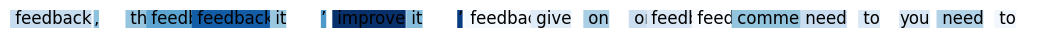

/var/folders/3g/2wscfy492xv8p55yn6b0rthw0000gn/T/ipykernel_63738/65976916.py:26: RuntimeWarning: invalid value encountered in divide
  norm_activations = (activations - np.min(activations)) / (np.max(activations) - np.min(activations))


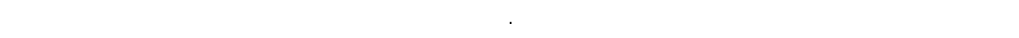

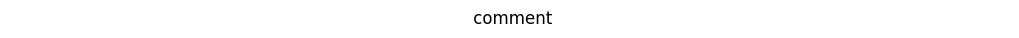

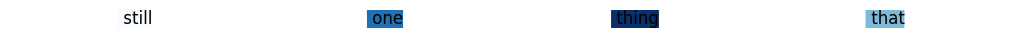

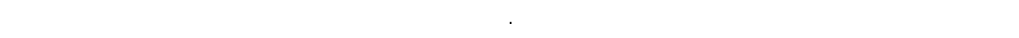

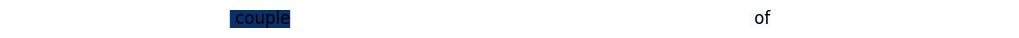

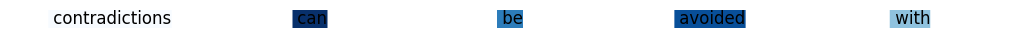

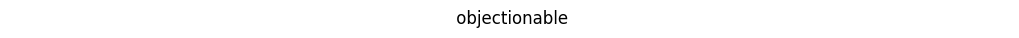

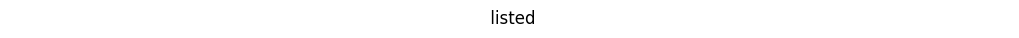

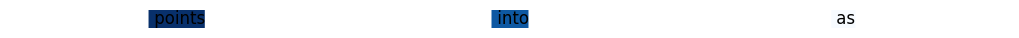

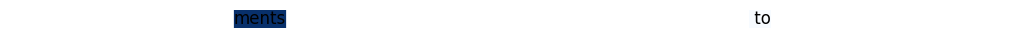

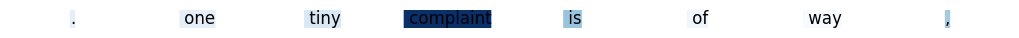

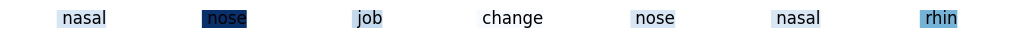

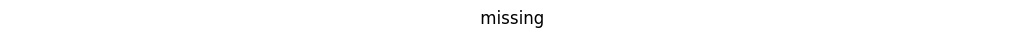

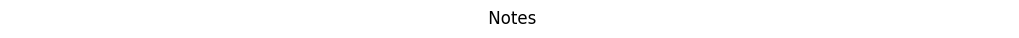

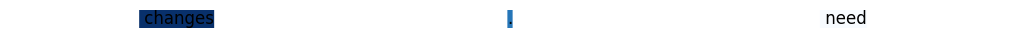

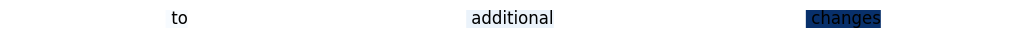

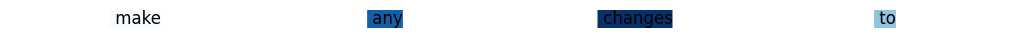

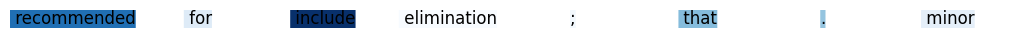

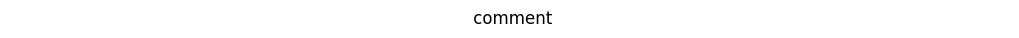

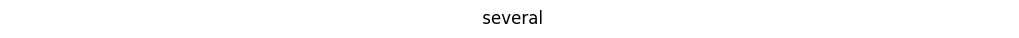

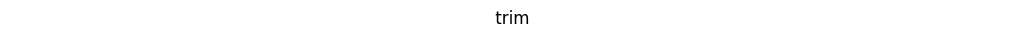

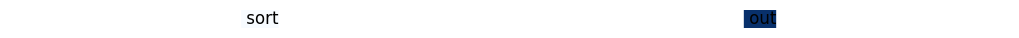

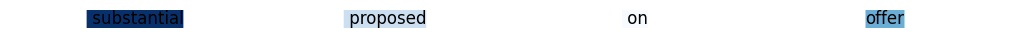

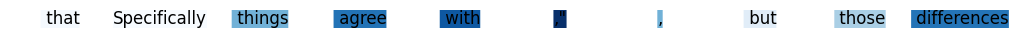

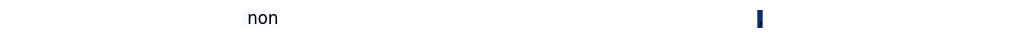

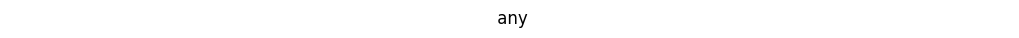

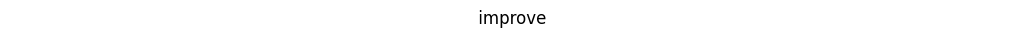

In [45]:
visualize_feature(2400, activations, locations)